In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_movie = pd.read_csv('clean_movie.csv')
df_movie.head()

,Unnamed: 0,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,0,Avatar: The Way of Water,7.8,2022,December,PG-13,192.0,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,350000000.0,2.267947e+09,United States
1,1,Guillermo del Toro's Pinocchio,7.6,2022,December,PG,117.0,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,35000000.0,1.089670e+05,"United States, Mexico, France"
2,2,Bullet Train,7.3,2022,August,R,127.0,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,85900000.0,2.392686e+08,"Japan, United States"
3,4,M3gan,6.4,2022,December,PG-13,102.0,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,12000000.0,1.712539e+08,United States
4,6,Amsterdam,6.1,2022,October,R,134.0,David O Russell,"Christian Bale, Margot Robbie, John David Wash...","Comedy, Drama, History",USA,80000000.0,3.124581e+07,"United States, Japan"


### NHÃN PHIM PHỔ BIẾN

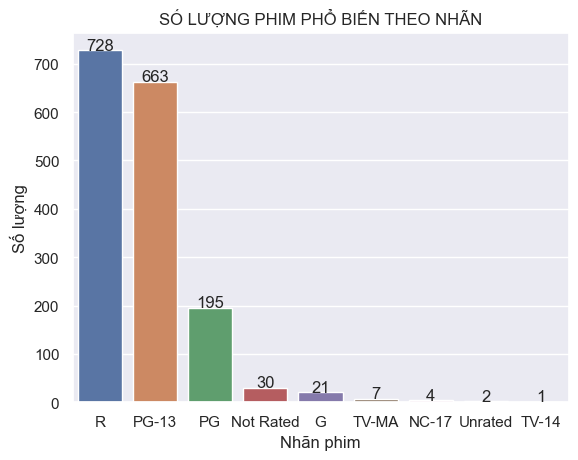

In [3]:
certificate = df_movie['Certificate'].value_counts().reset_index().rename(columns={'index':'Nhãn phim','Certificate':'Số lượng'})

sns.set(style="darkgrid")
ax = sns.barplot(x="Nhãn phim", y="Số lượng", data=certificate)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 1,
            '{:.0f}'.format(height),
            ha="center")

ax.set_title('SỐ LƯỢNG PHIM PHỔ BIẾN THEO NHÃN')
ax.set_xlabel('Nhãn phim')
ax.set_ylabel('Số lượng')

plt.show()

- Lựa chọn biểu đồ bar chart để biểu diễn số liệu về tổng lượng phim theo từng loại nhãn, cho thấy những nhãn phim phổ biến nhất.
- Theo như biểu đồ ta thấy, những nhãn phim phổ biến nhất là R, PG-13, PG
    + R (Restricted) – Thanh thiếu niên dưới 17 tuổi không được xem phim nếu không có sự đồng ý của người lớn.
    + PG-13 (Parents Strongly Cautioned) – Phim có một số chi tiết không phù hợp với trẻ dưới 13 tuổi.
    + PG (Parental Guidance Suggested) – Phim có thể có một số chi tiết (hình ảnh, từ ngữ) không phù hợp với trẻ nhỏ. Bố mẹ cần cân nhắc khi cho con cái xem phim.
- Điều này cho thấy những bộ phim phổ biến đa số phù hợp cho lứa tuổi từ 18 tuổi trở lên. Đây cũng là một điều phù hợp vì đây là lứa tuổi có đủ nhận thức để đánh giá, suy nghĩ, đồng thời có năng lực tự chi trả cho nhu cầu giải trí của bản thân. Với những phim khi có đánh giá thu được từ lứa tuổi này cũng thể hiện sự khách quan về chất lượng phim, là nguồn dữ liệu phong phú, nhiều tiềm năng khai thác.


### THỜI GIAN CHI PHÍ

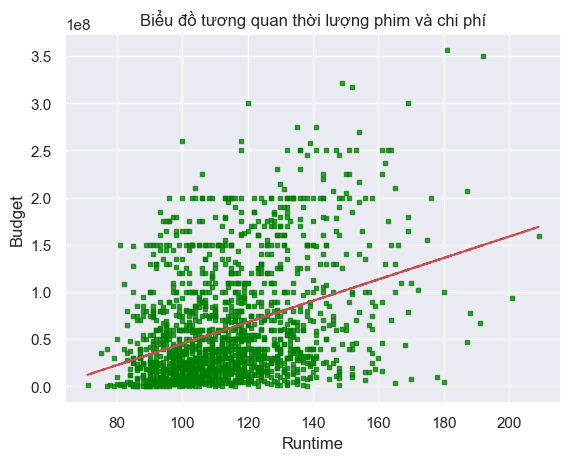

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x = df_movie.Runtime
y = df_movie.Budget

plt.scatter(x, y, c = 'green',s=10, alpha=0.75, marker='s')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

plt.title("Biểu đồ tương quan thời lượng phim và chi phí")
plt.xlabel('Runtime')
plt.ylabel('Budget')
plt.show()

- Chọn Biểu đồ phân tán để trực quan hóa mối tương quan giữa hai trường dữ liệu Runtime và Budget (2 biến độc lập)
- Theo như biểu đồ ta thấy, đa phần các điểm tập trung vào góc dưới bên trái. Đường xu hướng theo chiều đi lên phần nào thể hiện mối nhân quả giữa thời lượng phim và chi phí phim. Có thể nói thời lượng phim dài ngắn có ảnh hưởng tới chi phí khi làm phim. Đây cũng là một điều thực tế, khi thời lượng phim ngắn, các chi phí bỏ ra cho công đoạn làm phim sẽ tốn ít hơn nếu làm phim có thời lượng dài, chi phí quay hình, chi phí cắt chụp,... đều có thể tăng lên khi phim được quay dài ra.